# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=5000) #TODO change this back at some point bc the size is so small. 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1414

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [44]:
#wrap this in a try and accept to grab stuff

url = "http://api.openweathermap.org/data/2.5/weather?"

temp = []
humidity = []
clouds = []
wind_speed = []
new_lats = []
new_longs = []
cities_4_del = []


for city in cities: 
    try: 
        city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
        json_responce = requests.get(city_url).json()
        temp.append(1.8 * (float(json_responce["main"]["temp"])-273) + 32)
        humidity.append(json_responce["main"]["humidity"])
        clouds.append(json_responce["clouds"]["all"])
        wind_speed.append(json_responce["wind"]["speed"])
        new_lats.append(json_responce['coord']['lat'])
        new_longs.append(json_responce['coord']['lon'])
    
        print(f'adding {city}')

        #in here we are grabbing weather data for each city. 
    except KeyError:
        print("city not found... skipping.....")
        cities_4_del.append(city)
   

ngulu
adding ahipara
adding lompoc
adding marzuq
adding chadiza
city not found... skipping.....
city not found... skipping.....
adding nong khae
adding cap malheureux
adding kisangani
adding torbay
adding victoria
adding chilca
adding luganville
adding grafton
city not found... skipping.....
adding bilibino
adding rio gallegos
adding novyy urgal
adding hauterive
city not found... skipping.....
adding tiznit
adding tazmalt
adding pisco
adding dwarka
adding laguna
adding dakar
adding ilulissat
adding havre-saint-pierre
adding port hedland
adding voh
adding saint-augustin
adding rawson
adding nemuro
adding roma
city not found... skipping.....
adding gornopravdinsk
city not found... skipping.....
adding bowen
adding aksu
adding acari
adding lagoa
adding tuscaloosa
adding ust-kulom
adding wawa
adding gladstone
adding xuddur
adding bilma
adding te anau
adding lavrentiya
adding wahiawa
adding adrar
city not found... skipping.....
adding miri
city not found... skipping.....
adding sumenep
addi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
for city in cities_4_del:
    cities.remove(city)

In [46]:


data = {
    "City" : cities,
    "Latitude" : new_lats,
    "Longitude" :new_longs,
    "Temperature" : temp,
    "Humidity" : humidity,
    "Cloudiness %" : clouds,
    "Wind Speed (mph)" : wind_speed
}
print(len(cities))
print(len(new_lats))
#makes blanks in dataframe so I don't have to think with my brain and can instaed think with computer brain

weather_df = pd.DataFrame(data)
weather_df


1310
1310


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness %,Wind Speed (mph)
0,rubtsovsk,51.5000,81.2500,48.560,51,100,2.99
1,pangkalanbuun,-2.6833,111.6167,80.204,84,95,1.37
2,leningradskiy,69.3833,178.4167,19.436,92,100,10.70
3,new norfolk,-42.7826,147.0587,62.816,55,75,5.14
4,kichera,55.9375,110.0997,38.876,62,100,0.72
...,...,...,...,...,...,...,...
1305,lar,26.2039,83.9717,84.362,34,0,3.22
1306,bajil,15.0584,43.2851,84.992,56,96,1.86
1307,pau dos ferros,-6.1125,-38.2063,77.072,70,100,1.19
1308,lampazos de naranjo,27.0167,-100.5167,66.362,76,100,4.30


In [47]:

weather_df.to_csv("weather_data.csv") #make a lil csv
weather_df


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness %,Wind Speed (mph)
0,rubtsovsk,51.5000,81.2500,48.560,51,100,2.99
1,pangkalanbuun,-2.6833,111.6167,80.204,84,95,1.37
2,leningradskiy,69.3833,178.4167,19.436,92,100,10.70
3,new norfolk,-42.7826,147.0587,62.816,55,75,5.14
4,kichera,55.9375,110.0997,38.876,62,100,0.72
...,...,...,...,...,...,...,...
1305,lar,26.2039,83.9717,84.362,34,0,3.22
1306,bajil,15.0584,43.2851,84.992,56,96,1.86
1307,pau dos ferros,-6.1125,-38.2063,77.072,70,100,1.19
1308,lampazos de naranjo,27.0167,-100.5167,66.362,76,100,4.30


In [48]:
weather_df = pd.read_csv('weather_data.csv')
weather_df

,Unnamed: 0,City,Latitude,Longitude,Temperature,Humidity,Cloudiness %,Wind Speed (mph)
0,0,rubtsovsk,51.5000,81.2500,48.560,51,100,2.99
1,1,pangkalanbuun,-2.6833,111.6167,80.204,84,95,1.37
2,2,leningradskiy,69.3833,178.4167,19.436,92,100,10.70
3,3,new norfolk,-42.7826,147.0587,62.816,55,75,5.14
4,4,kichera,55.9375,110.0997,38.876,62,100,0.72
...,...,...,...,...,...,...,...,...
1305,1305,lar,26.2039,83.9717,84.362,34,0,3.22
1306,1306,bajil,15.0584,43.2851,84.992,56,96,1.86
1307,1307,pau dos ferros,-6.1125,-38.2063,77.072,70,100,1.19
1308,1308,lampazos de naranjo,27.0167,-100.5167,66.362,76,100,4.30


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [49]:
weather_df[weather_df["Humidity"] > 100]

#nothing in dataset matches criteria.

,Unnamed: 0,City,Latitude,Longitude,Temperature,Humidity,Cloudiness %,Wind Speed (mph)


In [50]:
#  Get the indices of cities that have humidity over 100%.


In [51]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

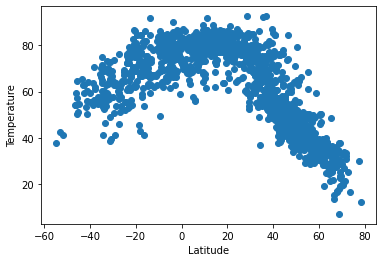

In [52]:
plt.scatter(weather_df['Latitude'], weather_df['Temperature'])
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.show()

## Latitude vs. Humidity Plot

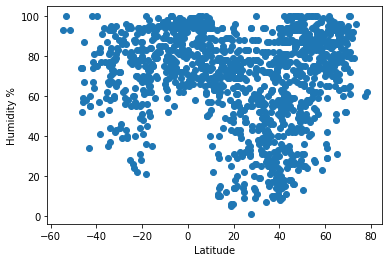

In [53]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'])
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.show()

## Latitude vs. Cloudiness Plot

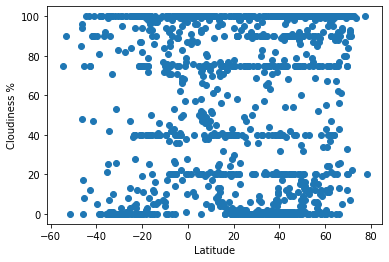

In [54]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness %'])
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.show()

## Latitude vs. Wind Speed Plot

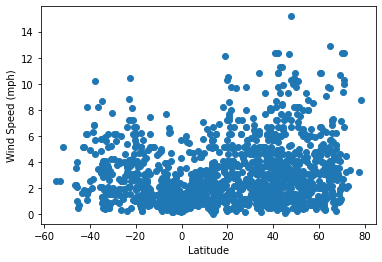

In [55]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (mph)'])
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

1310
955
The r-squared is : 0.7529483964211428


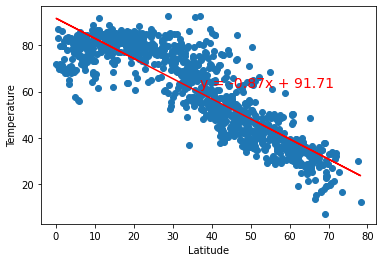

In [67]:
subplot_df = weather_df[weather_df['Latitude'] > 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Temperature'])
plt.ylabel('Temperature')
plt.xlabel('Latitude')
print(len(weather_df))
print(len(subplot_df))
regression = linregress(subplot_df['Latitude'], subplot_df['Temperature'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Temperature']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (37,62), fontsize=14, color='red')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.4233483377957576


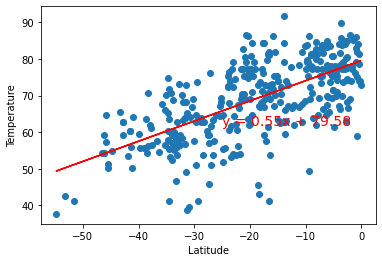

In [57]:
subplot_df = weather_df[weather_df['Latitude'] < 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Temperature'])
plt.ylabel('Temperature')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Temperature'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Temperature']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (-25,62), fontsize=14, color='red')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.009214061492965742


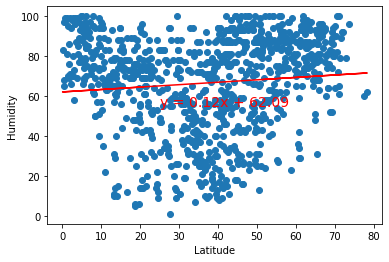

In [69]:
subplot_df = weather_df[weather_df['Latitude'] > 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Humidity'])
plt.ylabel('Humidity')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Humidity'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Humidity']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (25,55), fontsize=14, color='red')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.08185406289651198


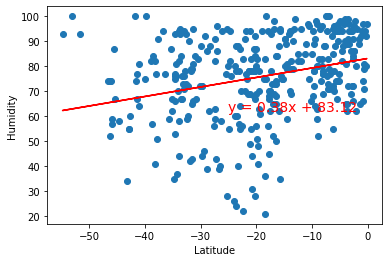

In [59]:
subplot_df = weather_df[weather_df['Latitude'] < 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Humidity'])
plt.ylabel('Humidity')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Humidity'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Humidity']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (-25,62), fontsize=14, color='red')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.01111548767354269


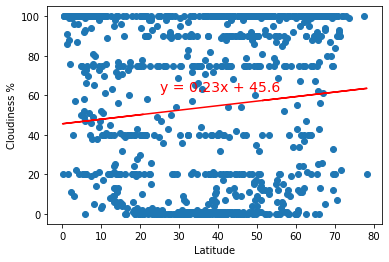

In [60]:
subplot_df = weather_df[weather_df['Latitude'] > 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Cloudiness %'])
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Cloudiness %'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Cloudiness %']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (25,62), fontsize=14, color='red')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.04151911281189931


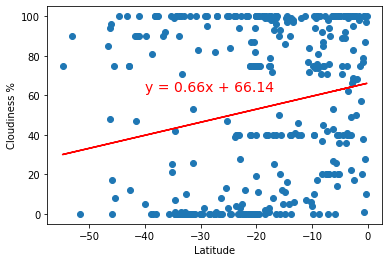

In [70]:
subplot_df = weather_df[weather_df['Latitude'] < 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Cloudiness %'])
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Cloudiness %'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Cloudiness %']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (-40,62), fontsize=14, color='red')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.03906157592208359


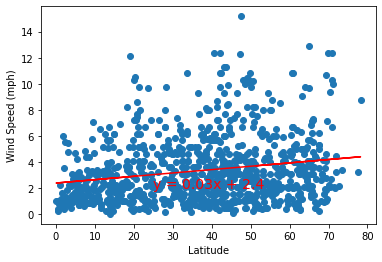

In [62]:
subplot_df = weather_df[weather_df['Latitude'] > 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Wind Speed (mph)'])
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Wind Speed (mph)'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Wind Speed (mph)']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (25,2), fontsize=14, color='red')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.08084568353059463


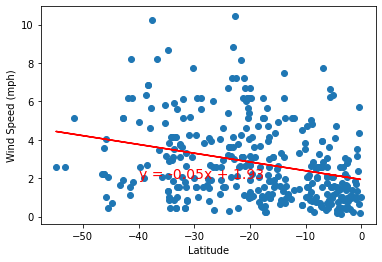

In [73]:
subplot_df = weather_df[weather_df['Latitude'] < 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Wind Speed (mph)'])
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Wind Speed (mph)'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Wind Speed (mph)']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (-40,2), fontsize=14, color='red')
plt.show()